In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest,f_regression

In [3]:
insurance=pd.read_csv('/Users/Lovely_Ray/Desktop/data science/Regression project/insurance_new.csv')

In [4]:
insurance.head()

,Age,Sex,BMI,Children,Smoker,Diabetes,BloodPressure_Problems,Any_Transplants,Any_ChronicDiseases,Known_Allergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Region,Premium_charges
0,19,female,28,0,no,0,0,0,0,0,0,0,southwest,9887
1,27,male,34,1,no,1,0,0,0,0,0,0,southeast,34789
2,18,female,30,0,no,1,1,0,0,0,1,1,southeast,37000
3,18,male,16,0,no,1,1,0,0,0,1,1,northwest,37461
4,18,male,34,0,no,0,0,0,0,0,0,1,northwest,28000


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1559 non-null   int64 
 1   Sex                      1559 non-null   object
 2   BMI                      1559 non-null   int64 
 3   Children                 1559 non-null   int64 
 4   Smoker                   1559 non-null   object
 5   Diabetes                 1559 non-null   int64 
 6   BloodPressure_Problems   1559 non-null   int64 
 7   Any_Transplants          1559 non-null   int64 
 8   Any_ChronicDiseases      1559 non-null   int64 
 9   Known_Allergies          1559 non-null   int64 
 10  HistoryOfCancerInFamily  1559 non-null   int64 
 11  NumberOfMajorSurgeries   1559 non-null   int64 
 12  Region                   1559 non-null   object
 13  Premium_charges          1559 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 17

In [6]:
insurance.isnull().sum()

Age                        0
Sex                        0
BMI                        0
Children                   0
Smoker                     0
Diabetes                   0
BloodPressure_Problems     0
Any_Transplants            0
Any_ChronicDiseases        0
Known_Allergies            0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
Region                     0
Premium_charges            0
dtype: int64

In [7]:
insurance['Sex']=insurance['Sex'].astype("category")
insurance['Smoker']=insurance['Smoker'].astype("category")
insurance['Diabetes']=insurance['Diabetes'].astype("category")
insurance['BloodPressure_Problems']=insurance['BloodPressure_Problems'].astype("category")
insurance['Any_Transplants']=insurance['Any_Transplants'].astype("category")
insurance['Any_ChronicDiseases']=insurance['Any_ChronicDiseases'].astype("category")
insurance['Known_Allergies']=insurance['Known_Allergies'].astype("category")
insurance['HistoryOfCancerInFamily']=insurance['HistoryOfCancerInFamily'].astype("category")
insurance['NumberOfMajorSurgeries']=insurance['NumberOfMajorSurgeries'].astype("category")

#converting object type data to categories

In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      1559 non-null   int64   
 1   Sex                      1559 non-null   category
 2   BMI                      1559 non-null   int64   
 3   Children                 1559 non-null   int64   
 4   Smoker                   1559 non-null   category
 5   Diabetes                 1559 non-null   category
 6   BloodPressure_Problems   1559 non-null   category
 7   Any_Transplants          1559 non-null   category
 8   Any_ChronicDiseases      1559 non-null   category
 9   Known_Allergies          1559 non-null   category
 10  HistoryOfCancerInFamily  1559 non-null   category
 11  NumberOfMajorSurgeries   1559 non-null   category
 12  Region                   1559 non-null   object  
 13  Premium_charges          1559 non-null   int64   
dtypes: categ

In [9]:
insurance.describe()

,Age,BMI,Children,Premium_charges
count,1559.000000,1559.000000,1559.000000,1559.000000
mean,38.924310,31.227710,1.319436,52921.449006
std,12.806225,6.431238,1.349873,14392.364651
min,18.000000,16.000000,0.000000,8561.000000
25%,28.000000,27.000000,0.000000,43250.500000
50%,37.000000,31.000000,1.000000,52000.000000
75%,49.000000,36.000000,2.000000,64000.000000
max,64.000000,53.000000,5.000000,85000.000000


In [10]:
insurance.corr()#correlation analysis

,Age,BMI,Children,Premium_charges
Age,1.000000,0.016154,0.018702,0.711756
BMI,0.016154,1.000000,0.054534,0.069373
Children,0.018702,0.054534,1.000000,0.122144
Premium_charges,0.711756,0.069373,0.122144,1.000000


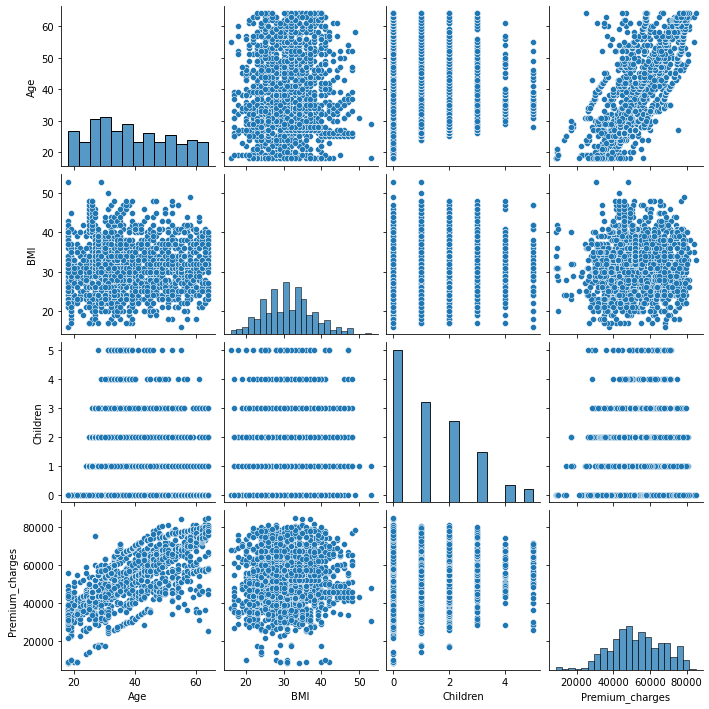

In [11]:
sns.pairplot(insurance)

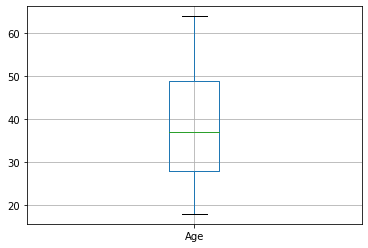

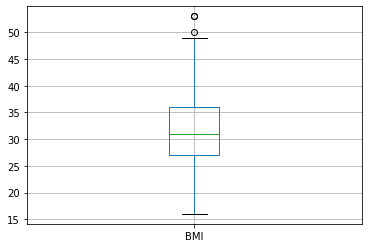

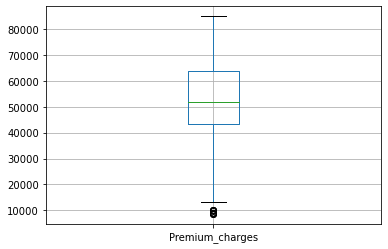

In [12]:
numerical_columns = ['Age', 'BMI', 'Premium_charges']
for column in numerical_columns:
    insurance.boxplot(column)
    plt.show()

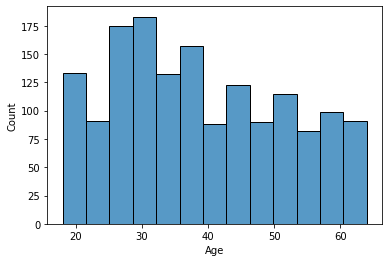

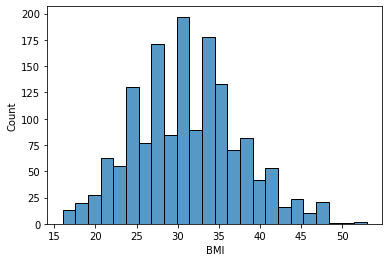

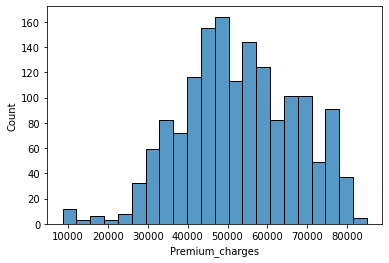

[None, None, None]

In [13]:
# sns.histplot(x='Premium_charges', data=insurance);
def gen_histplots(column, insurance):
    sns.histplot(x=column, data=insurance);
    plt.show();
    
[gen_histplots(column, insurance) for column in numerical_columns]

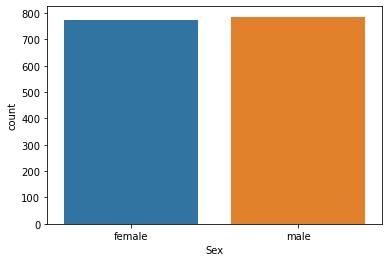

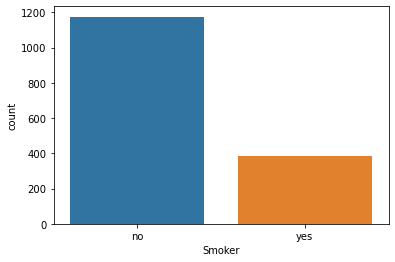

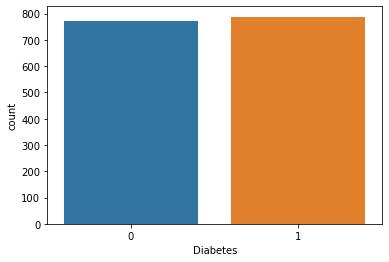

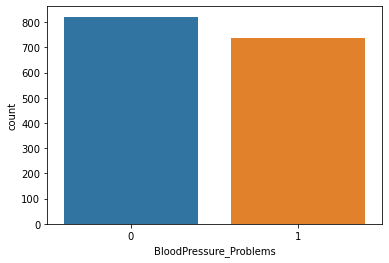

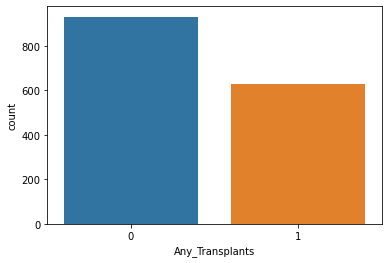

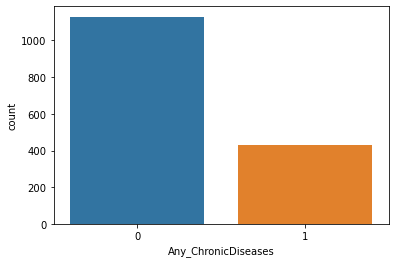

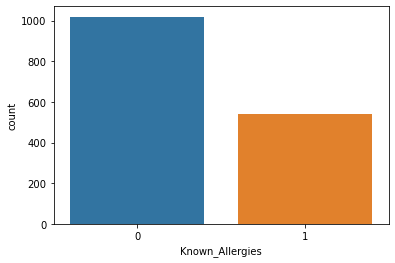

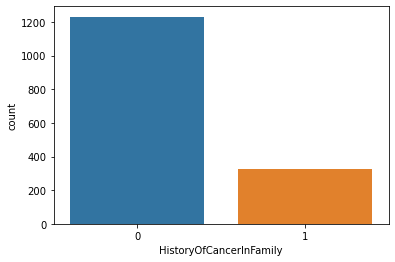

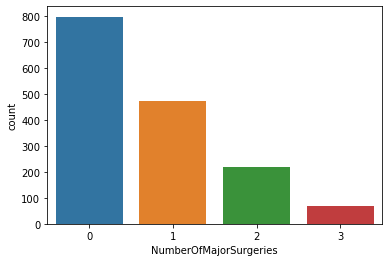

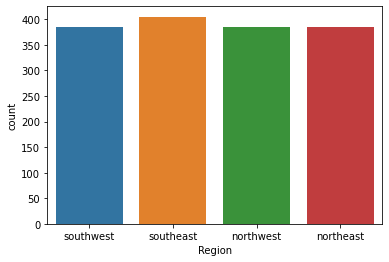

[None, None, None, None, None, None, None, None, None, None]

In [14]:
categorical_columns = ['Sex', 'Smoker', 'Diabetes','BloodPressure_Problems','Any_Transplants','Any_ChronicDiseases','Known_Allergies','HistoryOfCancerInFamily','NumberOfMajorSurgeries','Region']
def gen_countplots(column, insurance=insurance):
    sns.countplot(x=column, data=insurance);
    plt.show();

[gen_countplots(column) for column in categorical_columns]

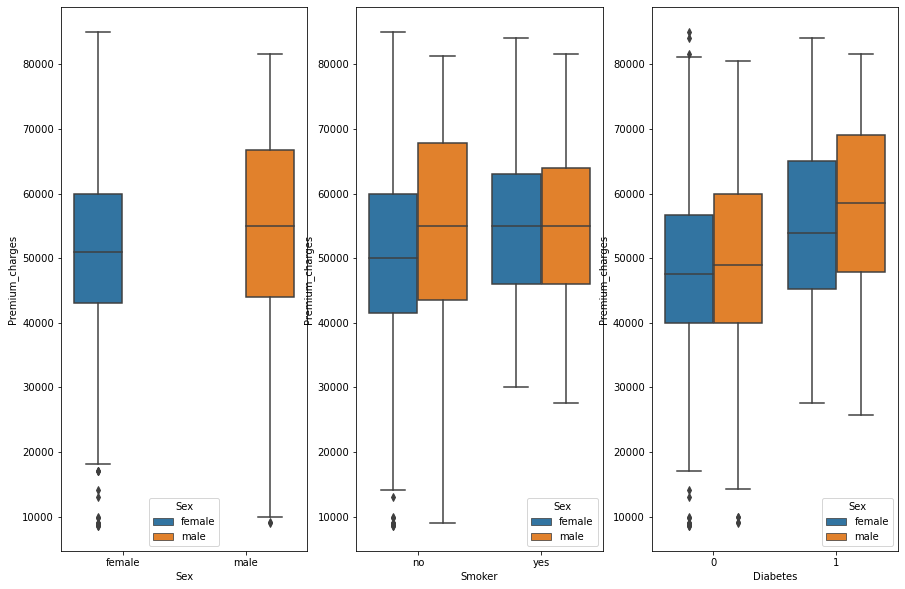

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
for var, subplot in zip(categorical_columns, ax.flatten()):
    sns.boxplot(x=var, y='Premium_charges', hue = 'Sex', data=insurance, ax=subplot)

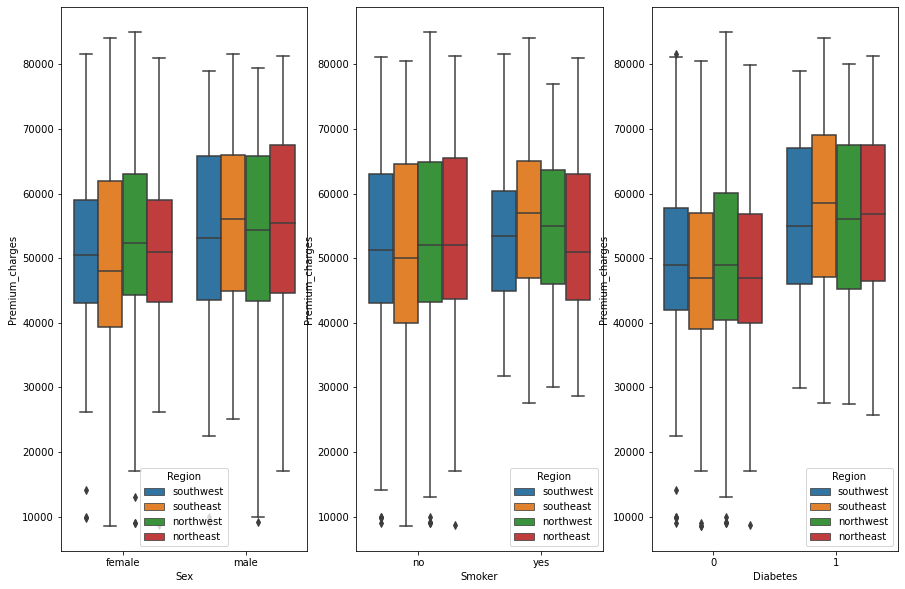

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
for var, subplot in zip(categorical_columns, ax.flatten()):
    sns.boxplot(x=var, y='Premium_charges', hue = 'Region', data=insurance, ax=subplot)

## Encoding the categorical features

In [17]:
insurance.replace({'Sex':{'male':0,'female':1}},inplace=True)
insurance.replace({'Smoker':{'yes':1,'no':0}},inplace=True)
insurance.replace({'Region':{'southwest':1,'southeast':2,'northwest':3,'northeast':4}},inplace=True)

In [18]:
insurance.sample(5)

,Age,Sex,BMI,Children,Smoker,Diabetes,BloodPressure_Problems,Any_Transplants,Any_ChronicDiseases,Known_Allergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Region,Premium_charges
470,27,0,33,0,0,1,0,0,0,0,0,0,2,29784
1115,55,0,35,1,0,1,0,1,1,1,0,2,2,77500
350,39,0,32,2,0,1,1,1,0,1,1,0,3,61000
1440,28,1,32,1,1,0,0,1,0,1,1,0,1,55000
981,34,0,21,0,0,0,0,0,0,0,0,0,4,27198


In [19]:
insurance[insurance.duplicated()]

,Age,Sex,BMI,Children,Smoker,Diabetes,BloodPressure_Problems,Any_Transplants,Any_ChronicDiseases,Known_Allergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Region,Premium_charges
1402,27,1,35,2,0,1,1,1,0,1,1,0,3,52000
1403,27,1,34,2,0,1,1,1,0,1,1,0,4,52000
1404,27,1,33,2,0,1,1,1,0,1,1,0,1,52000
1428,28,1,35,2,1,0,0,1,0,1,1,0,1,55000


In [20]:
data=insurance.drop_duplicates()

In [21]:
data.shape

(1555, 14)

In [22]:
data1=pd.get_dummies(data,columns=['Sex','Smoker','Region'])

In [23]:
data1.head()

,Age,BMI,Children,Diabetes,BloodPressure_Problems,Any_Transplants,Any_ChronicDiseases,Known_Allergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Premium_charges,Sex_1,Sex_0,Smoker_0,Smoker_1,Region_1,Region_2,Region_3,Region_4
0,19,28,0,0,0,0,0,0,0,0,9887,1,0,1,0,1,0,0,0
1,27,34,1,1,0,0,0,0,0,0,34789,0,1,1,0,0,1,0,0
2,18,30,0,1,1,0,0,0,1,1,37000,1,0,1,0,0,1,0,0
3,18,16,0,1,1,0,0,0,1,1,37461,0,1,1,0,0,0,1,0
4,18,34,0,0,0,0,0,0,0,1,28000,0,1,1,0,0,0,1,0


In [24]:
#Re-arranging the columns
data2 = data1[['Age', 'BMI', 'Children', 'Diabetes', 'BloodPressure_Problems',
       'Any_Transplants', 'Any_ChronicDiseases', 'Known_Allergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'Sex_0', 'Smoker_1', 
       'Region_3', 'Region_1', 'Region_2', 'Premium_charges']]
data2

,Age,BMI,Children,Diabetes,BloodPressure_Problems,Any_Transplants,Any_ChronicDiseases,Known_Allergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Sex_0,Smoker_1,Region_3,Region_1,Region_2,Premium_charges
0,19,28,0,0,0,0,0,0,0,0,0,0,0,1,0,9887
1,27,34,1,1,0,0,0,0,0,0,1,0,0,0,1,34789
2,18,30,0,1,1,0,0,0,1,1,0,0,0,0,1,37000
3,18,16,0,1,1,0,0,0,1,1,1,0,1,0,0,37461
4,18,34,0,0,0,0,0,0,0,1,1,0,1,0,0,28000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,30,23,1,1,0,1,1,1,1,0,1,1,0,0,1,57613
1555,31,26,2,1,0,1,1,1,1,0,1,1,0,0,1,58463
1556,33,25,3,1,0,1,1,1,1,0,1,1,0,0,1,59778
1557,29,22,1,1,0,1,1,1,1,0,1,1,0,0,1,57000


In [25]:
#splitting the dataset
X=data2.drop(columns='Premium_charges',axis=1)
Y=data2['Premium_charges']

In [26]:
X.head()

,Age,BMI,Children,Diabetes,BloodPressure_Problems,Any_Transplants,Any_ChronicDiseases,Known_Allergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Sex_0,Smoker_1,Region_3,Region_1,Region_2
0,19,28,0,0,0,0,0,0,0,0,0,0,0,1,0
1,27,34,1,1,0,0,0,0,0,0,1,0,0,0,1
2,18,30,0,1,1,0,0,0,1,1,0,0,0,0,1
3,18,16,0,1,1,0,0,0,1,1,1,0,1,0,0
4,18,34,0,0,0,0,0,0,0,1,1,0,1,0,0


In [27]:
Y.head()

0     9887
1    34789
2    37000
3    37461
4    28000
Name: Premium_charges, dtype: int64

## Normalizing the features for model building

In [28]:
#Normalizing the features using Min-Max scaler to bring features on a similar scale. 
sc = StandardScaler()
sc.fit_transform(X)

array([[-1.55834408, -0.50034184, -0.97553357, ..., -0.57264723,
         1.74930049, -0.59344243],
       [-0.93358014,  0.43199077, -0.23519453, ..., -0.57264723,
        -0.57165707,  1.68508343],
       [-1.63643958, -0.18956431, -0.97553357, ..., -0.57264723,
        -0.57165707,  1.68508343],
       ...,
       [-0.46500718, -0.96650815,  1.24548357, ..., -0.57264723,
        -0.57165707,  1.68508343],
       [-0.77738915, -1.43267446, -0.23519453, ..., -0.57264723,
        -0.57165707,  1.68508343],
       [-0.69929366, -0.81111938,  0.50514452, ..., -0.57264723,
        -0.57165707,  1.68508343]])

## splitting the data into training and testing data

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=2)

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(1555, 15) (1244, 15) (311, 15)


Model Training

* Linear Regression

In [31]:
LR=LinearRegression()

In [32]:
LR.fit(X_train,Y_train)

LinearRegression()

Model evaluation

In [33]:
#Prediction on training data
model_predict=LR.predict(X_train)

In [34]:
#R squared value
r2_train=metrics.r2_score(Y_train,model_predict)
print('R squared value: ',r2_train)

R squared value:  0.7378712584930935


In [35]:
#Prediction on test data
model_predict_test=LR.predict(X_test)

In [36]:
#R squared value
r2_test=metrics.r2_score(Y_test,model_predict_test)
print('R squared value: ',r2_test)

R squared value:  0.705257944477297


## Building a predictive system

In [37]:
input_data=(18,30,0,1,1,0,0,0,1,1,0,0,0,0,1)

#changing input data to numpy array
data_np_array=np.asarray(input_data)

#reshape the array
data_reshape=data_np_array.reshape(1,-1)
prediction=LR.predict(data_reshape)
print(prediction)

[41157.50698875]


/Users/Lovely_Ray/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model training

In [39]:
svm=SVR(kernel='linear')
svm.fit(X_train,Y_train)
rf=RandomForestRegressor(random_state=2)
rf.fit(X_train,Y_train)
gr=GradientBoostingRegressor(random_state=2)
gr.fit(X_train,Y_train)

GradientBoostingRegressor(random_state=2)

# Prediction on the test data

In [40]:
y_pred1=svm.predict(X_test)
y_pred2=rf.predict(X_test)
y_pred3=gr.predict(X_test)
df1=pd.DataFrame({'Actual':Y_test,'LR':model_predict_test,'svm':y_pred1,
                 'rf':y_pred2,'gr':y_pred3})

In [41]:
df1

,Actual,LR,svm,rf,gr
695,57984,58841.700988,53339.742763,52938.16,55843.699194
658,45987,47306.224784,58964.030819,44593.48,45493.872938
387,40000,39447.254193,44213.556320,43031.93,41426.717575
945,70000,64954.995483,65587.342863,63685.24,63409.152027
76,35000,33933.872925,35096.897626,38628.79,35172.445560
...,...,...,...,...,...
402,41000,36318.239873,43793.644917,44700.12,41183.234016
985,59874,66181.642757,62297.846669,53156.41,56370.403202
844,65987,57862.059047,64379.628807,63574.44,60053.778970
1185,76985,71914.340195,71608.086534,74114.67,72180.870030


# Model Evaluation

In [42]:
score1=metrics.r2_score(Y_test,model_predict_test)
score2=metrics.r2_score(Y_test,y_pred1)
score3=metrics.r2_score(Y_test,y_pred2)
score4=metrics.r2_score(Y_test,y_pred3)

In [43]:
print(score1,score2,score3,score4)

0.705257944477297 0.5099355302291053 0.8374358238567776 0.7883793663485507


In [44]:
#Adj R2 value
n = 1555
k = 15
Adj_score1=1 - (1 - score1)*(n-1) / (n-k-1)
Adj_score2=1 - (1 - score2)*(n-1) / (n-k-1)
Adj_score3=1 - (1 - score3)*(n-1) / (n-k-1)
Adj_score4=1 - (1 - score4)*(n-1) / (n-k-1)

In [45]:
print(Adj_score1,Adj_score2,Adj_score3,Adj_score4)

0.7023852148913057 0.5051590734087262 0.8358513776955376 0.7863167870731954


In [46]:
s1=metrics.mean_absolute_error(Y_test,model_predict_test)
s2=metrics.mean_absolute_error(Y_test,y_pred1)
s3=metrics.mean_absolute_error(Y_test,y_pred2)
s4=metrics.mean_absolute_error(Y_test,y_pred3)

In [47]:
print(s1,s2,s3,s4)

5533.586155774475 7168.710020506646 3618.1643086816725 4535.987520927392


## RFE(Recursive Feature Elimination)

In [48]:
#Drawing Important features from Random Forest model using RFE 
rfe_rf  = RFE(rf, n_features_to_select=None) 

In [49]:
rfe_rf.fit(X,Y)

RFE(estimator=RandomForestRegressor(random_state=2))

In [50]:
#Important features as per Random Forest model
rfe_rf.get_feature_names_out(input_features=X.columns)

array(['Age', 'BMI', 'Diabetes', 'BloodPressure_Problems',
       'Any_Transplants', 'Known_Allergies', 'NumberOfMajorSurgeries'],
      dtype=object)

In [51]:
#Drawing Important features from Gradient Boost model using RFE
rfe_gr  = RFE(gr, n_features_to_select=None)

In [52]:
rfe_gr.fit(X,Y)

RFE(estimator=GradientBoostingRegressor(random_state=2))

In [53]:
#Important features as per Gradient Boost model
rfe_gr.get_feature_names_out(input_features=X.columns)

array(['Age', 'Diabetes', 'Any_Transplants', 'Any_ChronicDiseases',
       'Known_Allergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries'], dtype=object)

In [54]:
#Drawing Important features from Linear Regression model using RFE 
rfe_LR = RFE(LR, n_features_to_select=None) 

In [55]:
rfe_LR.fit(X,Y)

RFE(estimator=LinearRegression())

In [56]:
#Important features as per Linear Regression model
rfe_LR.get_feature_names_out(input_features=X.columns)

array(['Diabetes', 'BloodPressure_Problems', 'Any_ChronicDiseases',
       'Known_Allergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries', 'Smoker_1'], dtype=object)

In [57]:
#Drawing Important features from SVR model using RFE 
rfe_svm = RFE(svm, n_features_to_select=None) 

In [58]:
rfe_svm.fit(X,Y)

RFE(estimator=SVR(kernel='linear'))

In [59]:
#Important features as per SVR model
rfe_svm.get_feature_names_out(input_features=X.columns)

array(['Age', 'Diabetes', 'Any_Transplants', 'Any_ChronicDiseases',
       'Known_Allergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries'], dtype=object)

In [60]:
#Comparing all the features from 4 models in a DataFrame
rfe_df = pd.DataFrame({'Random Forest' : rfe_rf.get_feature_names_out(input_features=X.columns),
                       'Gradient Boost' : rfe_gr.get_feature_names_out(input_features=X.columns),
                      'Linear Regression':rfe_LR.get_feature_names_out(input_features=X.columns),
                      'SVR':rfe_svm.get_feature_names_out(input_features=X.columns)})
rfe_df

,Random Forest,Gradient Boost,Linear Regression,SVR
0,Age,Age,Diabetes,Age
1,BMI,Diabetes,BloodPressure_Problems,Diabetes
2,Diabetes,Any_Transplants,Any_ChronicDiseases,Any_Transplants
3,BloodPressure_Problems,Any_ChronicDiseases,Known_Allergies,Any_ChronicDiseases
4,Any_Transplants,Known_Allergies,HistoryOfCancerInFamily,Known_Allergies
5,Known_Allergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,HistoryOfCancerInFamily
6,NumberOfMajorSurgeries,NumberOfMajorSurgeries,Smoker_1,NumberOfMajorSurgeries


##  The common features of the above 2 models are as below:
* Age
* diabetes
* Any_Transplants
* Known Allergies
* NumberOfmajorSurgeries
* and 2 common important features BloodPressure_Problems and HistoryOfCancerInFamily

## So Model building based on the above 7 important features

In [61]:
#Selecting only 5 significant features and 2 more common features for training
X_final = data2.loc[:, ['Age', 'Diabetes', 'Any_Transplants', 'Known_Allergies','NumberOfMajorSurgeries','BloodPressure_Problems','HistoryOfCancerInFamily']]

In [62]:
#Splitting into train & test variables
X_train_final, X_test_final, Y_train, Y_test = train_test_split(X_final, Y, random_state=2, test_size=0.30)

In [63]:
#Size of train & test data
X_train_final.shape, X_test_final.shape, Y_train.shape, Y_test.shape

((1088, 7), (467, 7), (1088,), (467,))

In [64]:
#Building models with default parameters
rf2  = RandomForestRegressor(random_state=2)
gr2 = GradientBoostingRegressor(random_state=2)

## RFE based Model training and evaluation

In [65]:
rf2.fit(X_train_final,Y_train)
gr2.fit(X_train_final,Y_train)

GradientBoostingRegressor(random_state=2)

## model prediction on the test data

In [66]:
y_pred_final1=rf2.predict(X_test_final)
y_pred_final2=gr2.predict(X_test_final)
df2=pd.DataFrame({'Actual':Y_test,
                 'rf2':y_pred_final1,'gr2':y_pred_final2})

In [67]:
df2

,Actual,rf2,gr2
695,57984,51603.890000,55216.173429
658,45987,45560.631750,48173.708367
387,40000,43336.945000,45075.757501
945,70000,62118.982357,60384.878037
76,35000,35171.573333,31898.193975
...,...,...,...
1067,75000,73974.600000,72652.792439
1552,57500,57313.390000,56343.341981
593,31546,36450.692427,33972.627275
1367,46000,46000.000000,47111.074752


## model evaluation

In [68]:
score_final_rf=metrics.r2_score(Y_test,y_pred_final1)
score_final_gr=metrics.r2_score(Y_test,y_pred_final2)

In [69]:
print(score_final_rf,score_final_gr)

0.7861406117365268 0.7734132540476384


In [70]:
#Adj R2 value
n = 1555
k = 8
Adj_score_rfe1=1 - (1 - score_final_rf)*(n-1) / (n-k-1)
Adj_score_rfe2=1 - (1 - score_final_gr)*(n-1) / (n-k-1)

In [71]:
print(Adj_score_rfe1,Adj_score_rfe2)

0.7850339654841932 0.7722407482471088


In [72]:
rfe_s1=metrics.mean_absolute_error(Y_test,y_pred_final1)
rfe_s2=metrics.mean_absolute_error(Y_test,y_pred_final2)

In [73]:
print(rfe_s1,rfe_s2)

3918.777133775456 4635.032864961472


## Select K-Best(SKB)

In [74]:
#Drawing Important features from Select-k-Best method 
select_reg =  SelectKBest(score_func=f_regression)

In [75]:
select_reg.fit(X, Y) 

SelectKBest(score_func=<function f_regression at 0x7f96f9070430>)

In [76]:
#Important features as per Select-k-Best 
select_reg.get_feature_names_out(input_features=X.columns)

array(['Age', 'Children', 'Diabetes', 'BloodPressure_Problems',
       'Any_Transplants', 'Any_ChronicDiseases', 'Known_Allergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'Sex_0'],
      dtype=object)

## So from the SKB method we found 10 important features viz.
* Age
* Children
* Diabetes
* BloodPressure_Problems
* Any_Transplants
* Any_ChronicDiseases
* Known_Allergies
* HistoryOfCancerInFamily
* NumberOfMajorSurgeries
* Sex_0

## we will try to build model incorporating the above 10 features and see the model performance

In [77]:
#Selecting only 10 significant features for training
X_skb = data2.loc[:, ['Age', 'Children', 'Diabetes', 'BloodPressure_Problems',
       'Any_Transplants', 'Any_ChronicDiseases', 'Known_Allergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'Sex_0']]

In [78]:
#Splitting into train & test variables
X_train_skb, X_test_skb, Y_train, Y_test = train_test_split(X_skb, Y, random_state=2, test_size=0.30)

In [79]:
#Size of train & test data
X_train_skb.shape, X_test_skb.shape, Y_train.shape, Y_test.shape

((1088, 10), (467, 10), (1088,), (467,))

In [80]:
#Building models with default parameters
rf3 = RandomForestRegressor(random_state=2)
gr3= GradientBoostingRegressor(random_state=2)

## SKB based model training and evaluation

In [81]:
rf3.fit(X_train_skb,Y_train)
gr3.fit(X_train_skb,Y_train)

GradientBoostingRegressor(random_state=2)

## model prediction on the test data

In [82]:
y_pred_skb1=rf3.predict(X_test_skb)
y_pred_skb2=gr3.predict(X_test_skb)
df3=pd.DataFrame({'Actual':Y_test,
                 'rf3':y_pred_skb1,'gr3':y_pred_skb2})

In [83]:
df3

,Actual,rf3,gr3
695,57984,48844.980000,54941.509927
658,45987,43033.180000,46270.832025
387,40000,43280.200000,45044.332035
945,70000,66364.637571,67489.474403
76,35000,36074.420000,35252.612521
...,...,...,...
1067,75000,72604.010000,72365.665728
1552,57500,57418.040000,58299.565800
593,31546,36778.903833,32786.886519
1367,46000,46000.000000,46730.517472


## model evaluation

In [84]:
score_skb_rf=metrics.r2_score(Y_test,y_pred_skb1)
score_skb_gr=metrics.r2_score(Y_test,y_pred_skb2)
print(score_skb_rf,score_skb_gr)

0.8393305808549163 0.8044811506231493


In [85]:
#Adj R2 value
n = 1555
k = 11
Adj_score_skb1=1 - (1 - score_skb_rf)*(n-1) / (n-k-1)
Adj_score_skb2=1 - (1 - score_skb_gr)*(n-1) / (n-k-1)
print(Adj_score_skb1,Adj_score_skb2)

0.8381851734598444 0.8030873027014738


In [86]:
skb_s1=metrics.mean_absolute_error(Y_test,y_pred_skb1)
skb_s2=metrics.mean_absolute_error(Y_test,y_pred_skb2)
print(skb_s1,skb_s2)

3446.0302037853294 4334.670623572787


## K fold model validation technique

### Using RandomForest Model

In [87]:
X_md = pd.concat([X_train_skb, X_test_skb])

In [88]:
Y_md = pd.concat([Y_train, Y_test])

In [89]:
skb_mod = KFold(n_splits=20, shuffle=True, random_state=2)

In [90]:
score_rf= cross_val_score(rf3, X_md, Y_md, cv=skb_mod, scoring='r2')
score_rf

array([0.87845167, 0.88884566, 0.91754502, 0.84197703, 0.82711958,
       0.85975734, 0.87719957, 0.6951842 , 0.8990669 , 0.80272036,
       0.86936929, 0.8563037 , 0.93422228, 0.92613869, 0.86451294,
       0.88592531, 0.91675988, 0.82195217, 0.86456718, 0.80986232])

In [91]:
np.round(score_rf.mean()*100, 2)

86.19

In [92]:
np.round(score_rf.std()*100, 2)

5.29

### Using GradientBoost Model

In [93]:
X_md = pd.concat([X_train_skb, X_test_skb])

In [94]:
Y_md = pd.concat([Y_train, Y_test])

In [95]:
skb_mod = KFold(n_splits=20, shuffle=True, random_state=2)

In [96]:
score_gr= cross_val_score(gr3, X_md, Y_md, cv=skb_mod, scoring='r2')
score_gr

array([0.84425261, 0.81491938, 0.88025296, 0.76108323, 0.77314133,
       0.88383659, 0.81777165, 0.62693357, 0.85840904, 0.72475481,
       0.85511934, 0.82976512, 0.89902175, 0.89545048, 0.83533079,
       0.84807514, 0.88914261, 0.76471846, 0.82959798, 0.76547432])

In [97]:
np.round(score_gr.mean()*100, 2)

81.99

In [98]:
np.round(score_gr.std()*100, 2)

6.6

## So Using K-fold validation, we can summarize the scores as below

* The RandomForest model's overall r2 score is around 86% with SD of around 5.
* The GradientBoost model's overall performance score is around 82% with SD of 6.

## So we can go ahead with RandomForest as the final model for this dataset

## Save model using joblib

In [103]:
rf=RandomForestRegressor(random_state=2)
rf.fit(X,Y)

RandomForestRegressor(random_state=2)

In [104]:
import joblib

In [105]:
filename = 'finalized_model.sav'
joblib.dump(rf, filename)

['finalized_model.sav']